<a href="https://colab.research.google.com/github/AI-Champ/AI-Champ/blob/main/Temperature_prediction_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/All_Datasets/Time_series/Weather_forecasting/DailyDelhiClimateTrain.csv')
test=pd.read_csv('/content/drive/MyDrive/All_Datasets/Time_series/Weather_forecasting/DailyDelhiClimateTest.csv')

In [ ]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
train.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [ ]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
len(test)

114

In [ ]:
test=test.drop(0)

In [ ]:
len(test)

113

In [ ]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727


In [ ]:
train=train.loc[:,['date','meantemp']]
test=test.loc[:,['date','meantemp']]

# EDA

In [ ]:
train.isna().sum()

date        0
meantemp    0
dtype: int64

In [ ]:
test.isna().sum()

date        0
meantemp    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      1462 non-null   object 
 1   meantemp  1462 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 1 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      113 non-null    object 
 1   meantemp  113 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1462 non-null   datetime64[ns]
 1   meantemp  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 1 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      113 non-null    datetime64[ns]
 1   meantemp  113 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


# Building Prophet Model.

In [ ]:
train.shape

(1462, 2)

In [ ]:
train.columns

Index(['date', 'meantemp'], dtype='object')

In [ ]:
test.shape

(113, 2)

In [ ]:
test.columns

Index(['date', 'meantemp'], dtype='object')

In [ ]:
df_train=train.copy(deep=True)
df_train.columns=['ds','y']
df_train.head()

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [ ]:
df_test=test.copy(deep=True)
df_test.columns=['ds','y']
df_test.head()

,ds,y
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889
5,2017-01-06,19.318182


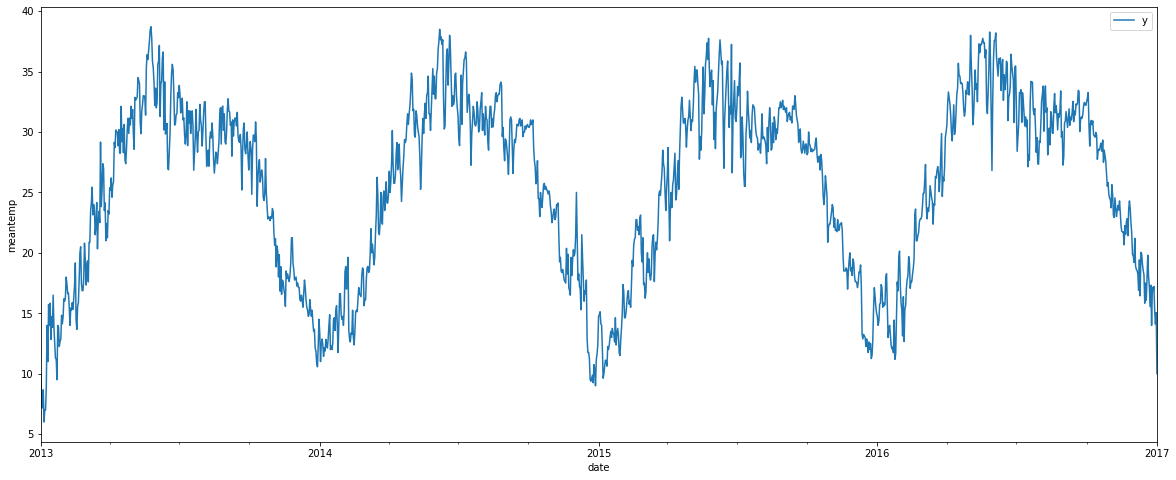

In [ ]:
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize']=20,8

df_train.plot(x='ds',y='y')
plt.xlabel('date')
plt.ylabel('meantemp')
plt.show()

In [ ]:
from prophet import Prophet
model=Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4w9cuas/b_3bvrlh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb4w9cuas/90uhzzvg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42686', 'data', 'file=/tmp/tmpb4w9cuas/b_3bvrlh.json', 'init=/tmp/tmpb4w9cuas/90uhzzvg.json', 'output', 'file=/tmp/tmpb4w9cuas/prophet_modelj7gvbn7r/prophet_model-20230326123451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:34:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:34:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future_dates_prophet=model.make_future_dataframe(periods=113)

In [ ]:
forecast=model.predict(future_dates_prophet)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.654535,6.391499,16.749477,24.654535,24.654535,-12.940437,-12.940437,-12.940437,0.034200,0.034200,0.034200,-12.974637,-12.974637,-12.974637,0.0,0.0,0.0,11.714098
1,2013-01-02,24.654874,6.541612,16.310435,24.654874,24.654874,-12.803834,-12.803834,-12.803834,0.146361,0.146361,0.146361,-12.950194,-12.950194,-12.950194,0.0,0.0,0.0,11.851040
2,2013-01-03,24.655213,6.764015,16.718314,24.655213,24.655213,-12.843333,-12.843333,-12.843333,0.067188,0.067188,0.067188,-12.910522,-12.910522,-12.910522,0.0,0.0,0.0,11.811879
3,2013-01-04,24.655552,6.608070,17.249389,24.655552,24.655552,-12.830075,-12.830075,-12.830075,0.027501,0.027501,0.027501,-12.857575,-12.857575,-12.857575,0.0,0.0,0.0,11.825477
4,2013-01-05,24.655890,6.446337,17.421631,24.655890,24.655890,-12.862578,-12.862578,-12.862578,-0.069220,-0.069220,-0.069220,-12.793358,-12.793358,-12.793358,0.0,0.0,0.0,11.793313


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1570,2017-04-20,27.925817,27.830908,37.859373,27.716755,28.159827,5.042465,5.042465,5.042465,0.067188,0.067188,0.067188,4.975277,4.975277,4.975277,0.0,0.0,0.0,32.968283
1571,2017-04-21,27.929038,27.750007,38.209781,27.716723,28.166197,5.183276,5.183276,5.183276,0.027501,0.027501,0.027501,5.155775,5.155775,5.155775,0.0,0.0,0.0,33.112313
1572,2017-04-22,27.932258,28.019170,38.784918,27.716690,28.172568,5.261917,5.261917,5.261917,-0.069220,-0.069220,-0.069220,5.331137,5.331137,5.331137,0.0,0.0,0.0,33.194175
1573,2017-04-23,27.935478,27.238890,38.741321,27.716658,28.178938,5.305521,5.305521,5.305521,-0.195222,-0.195222,-0.195222,5.500742,5.500742,5.500742,0.0,0.0,0.0,33.240999
1574,2017-04-24,27.938698,28.412886,38.518591,27.716626,28.185309,5.653232,5.653232,5.653232,-0.010809,-0.010809,-0.010809,5.664040,5.664040,5.664040,0.0,0.0,0.0,33.591930


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,11.714098,6.391499,16.749477
1,2013-01-02,11.851040,6.541612,16.310435
2,2013-01-03,11.811879,6.764015,16.718314
3,2013-01-04,11.825477,6.608070,17.249389
4,2013-01-05,11.793313,6.446337,17.421631


In [ ]:
forecast_train_data=forecast.loc[:len(forecast)-114,['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
df_train.tail()

,ds,y
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632
1461,2017-01-01,10.000000


In [ ]:
forecast_train_data.tail()

,ds,yhat,yhat_lower,yhat_upper
1457,2016-12-28,14.822809,9.594852,19.468184
1458,2016-12-29,14.693533,9.207293,19.445387
1459,2016-12-30,14.625318,9.341142,20.199640
1460,2016-12-31,14.520378,9.598897,19.798846
1461,2017-01-01,14.404952,9.088612,19.479980


In [ ]:
import math
from statsmodels.tools.eval_measures import rmse
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print(f"Root Mean Squared Error between actual and  predicted values: {rmse(forecast_train_data['yhat'],df_train['y'])}")

Root Mean Squared Error between actual and  predicted values: 2.0334135944147587


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model,forecast,figsize=(1000,500))

In [ ]:
plot_components_plotly(model,forecast)

In [ ]:
forecast_train_data.head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,11.714098,6.391499,16.749477
1,2013-01-02,11.851040,6.541612,16.310435
2,2013-01-03,11.811879,6.764015,16.718314
3,2013-01-04,11.825477,6.608070,17.249389
4,2013-01-05,11.793313,6.446337,17.421631


In [ ]:
# Merge actual and predicted values
performance = pd.merge(df_train, forecast_train_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

In [ ]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)

# Check the number of anomalies
performance['anomaly'].value_counts()

0    1441
1      21
Name: anomaly, dtype: int64

In [ ]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
4,2013-01-05,6.000000,11.793313,6.446337,17.421631,1
78,2013-03-20,29.166667,23.451806,17.713591,28.531727,1
144,2013-05-25,38.714286,33.431556,28.000874,38.279950,1
166,2013-06-16,27.000000,32.777575,27.895985,38.324699,1
167,2013-06-17,26.875000,32.835820,27.619198,38.220105,1
472,2014-04-18,24.250000,29.488050,24.734346,34.164986,1
497,2014-05-13,25.250000,32.628828,27.893987,38.320034,1
498,2014-05-14,26.875000,32.828512,27.497829,37.816965,1
535,2014-06-20,38.000000,32.855064,27.801641,37.965514,1
557,2014-07-12,35.875000,30.960887,25.727527,35.787433,1


<Axes: xlabel='ds', ylabel='y'>

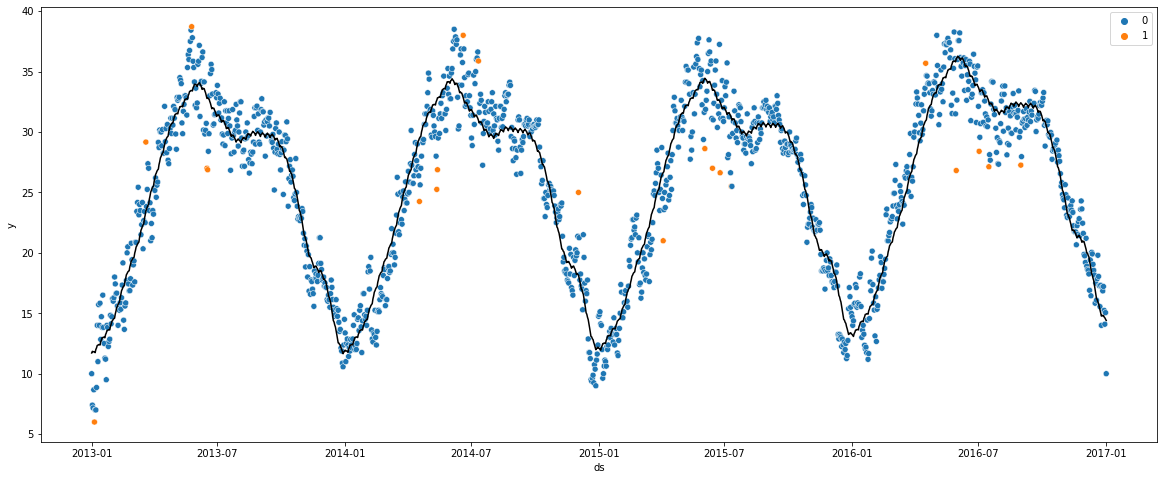

In [ ]:
# Visualize the anomalies
import seaborn as sns
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')

In [ ]:
forcast_test_data=forecast[-113:]

In [ ]:
forcast_test_data=forcast_test_data[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
forcast_test_data.head()

,ds,yhat,yhat_lower,yhat_upper
1462,2017-01-02,14.617029,9.853630,19.506459
1463,2017-01-03,14.704930,9.277493,19.562592
1464,2017-01-04,14.873257,9.482022,19.544381
1465,2017-01-05,14.861523,9.691730,19.979343
1466,2017-01-06,14.898545,9.374154,20.451255


In [ ]:
print(f"Root Mean Squared Error between actual and  predicted values: {rmse(forcast_test_data['yhat'],df_test['y'])}")

Root Mean Squared Error between actual and  predicted values: 2.7047757971513855


<Axes: xlabel='ds', ylabel='y'>

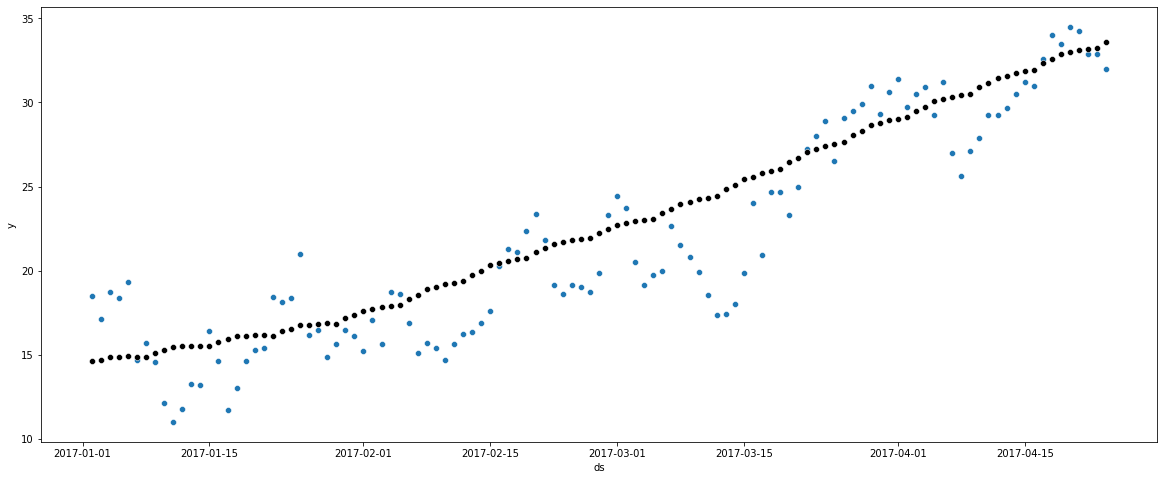

In [ ]:
# Visualize the anomalies
import seaborn as sns
sns.scatterplot(x='ds', y='y', data=df_test)
sns.scatterplot(x='ds', y='yhat', data=forcast_test_data, color='black')